# Dataset -> MNIST 
## Training samples -> 60,000  ;  Testing Samples -> 10,000
## Tensorflow has pre-installed MNIST Dataset which can be loaded using Keras

In [18]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tensorflow.keras.models import Model
from tensorflow.keras import datasets, layers, models
from keras.applications import inception_resnet_v2
from keras.applications import xception
from keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.layers import InputLayer,Dense,Flatten,GlobalAveragePooling2D,ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization,Dropout,Activation,Conv2D,MaxPooling2D
import os
import cv2
from keras.applications import inception_resnet_v2
from tensorflow.keras.models import Sequential, Model

In [3]:
mnist = tf.keras.datasets.mnist    #This is basically handwritten characters based on images of 0-9

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()   #Loading the dataset into Train and Test cases

11493376/11490434 [==============================] - 2s 0us/step


In [27]:
#Observing the Shapes Of the Train and Test Cases
print("The size of Training case is {}".format(x_train.shape))
print("The size of Testing case is {}".format(x_test.shape))
print("Number of target class is {}".format(len(np.unique(y_train))))

The size of Training case is (60000, 28, 28, 1)
The size of Testing case is (10000, 28, 28, 1)
Number of target class is 10


[35501, 55501, 21501, 10501, 32001, 47001, 53501]


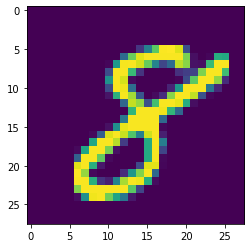

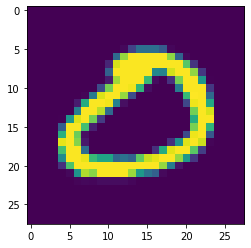

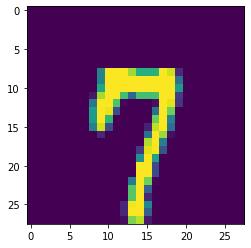

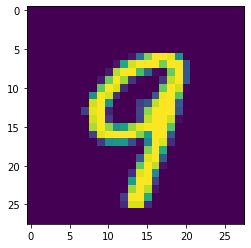

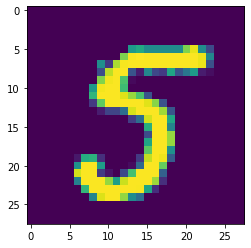

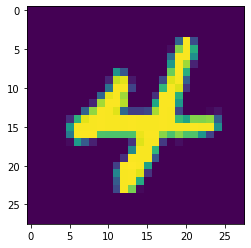

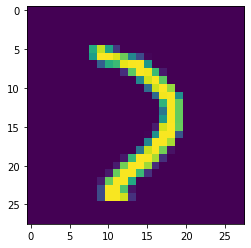

In [8]:
#Randomly visualizing 5 images
res = [random.randrange(1, 60000, 500) for i in range(7)]
print(res)
for i in res:
    plt.imshow(x_train[i])
    plt.show()

In [7]:
#Checking the values of each pixel
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [12]:
#Normalizing the images
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [16]:
#Resizing the images to make it suitable for CNN
img_size = 28
x_train = np.array(x_train).reshape(-1,img_size,img_size,1)
x_test = np.array(x_test).reshape(-1,img_size,img_size,1)

print('Training sample dimension {}'.format(x_train.shape))
print('Training sample dimension {}'.format(x_train.shape))

Training sample dimension (60000, 28, 28, 1)
Training sample dimension (60000, 28, 28, 1)


In [28]:
model = models.Sequential([
    layers.Conv2D(64, (3,3), activation = 'relu', padding='same', input_shape = x_train.shape[1:]),
    layers.BatchNormalization(momentum=0.95),
    layers.MaxPool2D((2,2), padding='same'),
    
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer = "HeNormal"),
    layers.BatchNormalization(momentum=0.95),
    layers.MaxPool2D((2,2), padding='same'),
                    
    layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer = "HeNormal"),
    layers.BatchNormalization(momentum=0.95),
    layers.MaxPool2D((2,2), padding='same'),
    
    layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer = "HeNormal"),
    layers.BatchNormalization(momentum=0.95),
    layers.MaxPool2D((2,2), padding='same'),
          
    layers.GlobalAveragePooling2D(),
    
    layers.Dense(512, activation='relu',kernel_initializer = "HeUniform"),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
#dense - 256(0.5), 128(0.5), 64(0.5), softmax

In [29]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy',
                   metrics = ['accuracy'])

In [30]:
#early stopping

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
checkpoint = ModelCheckpoint('model/flowers_detection2.h5', monitor = 'val_loss', save_best_only = True,
                             mode = 'min', verbose = 1)
earlystop = EarlyStopping(monitor = 'val_loss', patience = 7, mode = 'min', verbose = 1, restore_best_weights = True,
                          min_delta = 0.001)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3, patience = 3, verbose = 1, mode = 'min',
                              min_delta = 0.0001)
callback = [checkpoint, reduce_lr, earlystop]

In [31]:
cnn_model = model.fit(x_train,y_train, batch_size = 64, epochs = 50, callbacks = [callback],
                    validation_split = 0.3)

Epoch 1/50
657/657 [==============================] - 404s 614ms/step - loss: 0.8465 - accuracy: 0.7531 - val_loss: 0.0887 - val_accuracy: 0.9714

Epoch 00001: val_loss improved from inf to 0.08874, saving model to model\flowers_detection2.h5
Epoch 2/50
657/657 [==============================] - 469s 714ms/step - loss: 0.1012 - accuracy: 0.9692 - val_loss: 0.0596 - val_accuracy: 0.9814

Epoch 00002: val_loss improved from 0.08874 to 0.05960, saving model to model\flowers_detection2.h5
Epoch 3/50
657/657 [==============================] - 307s 467ms/step - loss: 0.0536 - accuracy: 0.9836 - val_loss: 0.0457 - val_accuracy: 0.9859

Epoch 00003: val_loss improved from 0.05960 to 0.04572, saving model to model\flowers_detection2.h5
Epoch 4/50
657/657 [==============================] - 348s 530ms/step - loss: 0.0355 - accuracy: 0.9892 - val_loss: 0.0442 - val_accuracy: 0.9858

Epoch 00004: val_loss improved from 0.04572 to 0.04415, saving model to model\flowers_detection2.h5
Epoch 5/50
657/6

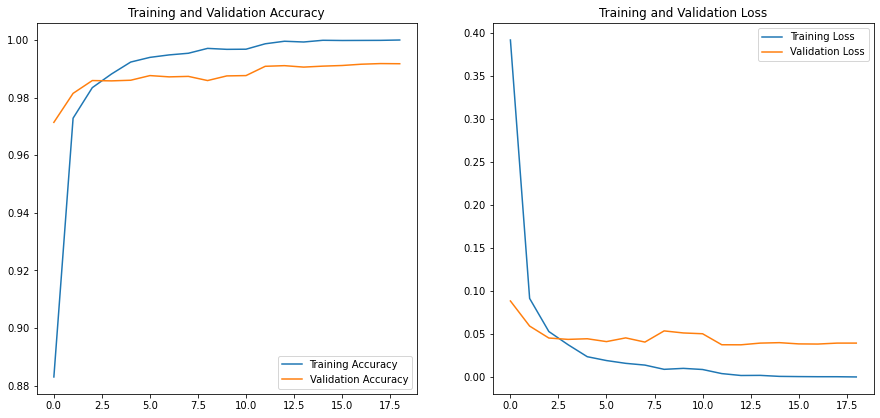

In [32]:
acc = cnn_model.history['accuracy']
val_acc = cnn_model.history['val_accuracy']
loss = cnn_model.history['loss']
val_loss = cnn_model.history['val_loss']

epochs_range = range(19)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [34]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_test, predictions))

C:\Users\KIIT\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, predictions)
print(cm)

[[ 975    0    1    0    0    0    1    1    2    0]
 [   0 1129    2    1    0    0    2    0    1    0]
 [   2    1 1026    1    0    0    0    1    1    0]
 [   0    0    0 1006    0    2    0    0    2    0]
 [   0    0    0    0  970    0    3    0    2    7]
 [   1    0    0    7    0  881    1    0    0    2]
 [   4    2    0    1    1    4  946    0    0    0]
 [   0    1    5    1    0    0    0 1020    0    1]
 [   1    1    1    0    0    1    0    0  969    1]
 [   0    3    0    2    5    6    1    2    2  988]]


In [36]:
print('accuracy in test_set: {}'.format(accuracy_score(y_test,predictions)*100),'%')

accuracy in test_set: 99.1 %
